<h1> Illustration of the fixed support Wasserstein barycenter of Gaussian measures using the POT library

This document is dedicated to the computation of the quantity
    \begin{equation*}
        \underset{Y\in(\mathbb{R}^d)^N}{\text{min}}\sum_{l=1}^LW_2^2\left(\mu^l,\frac{1}{N}\sum_{i=1}^N\delta_{y_i}\right)
    \end{equation*}
 where the target measures $\mu^l,\:l=1,...,L$ are Gaussian measures.

In [ ]:

from builtins import range

import sys
sys.path.append('..');
import os
import numpy as np
import scipy as sp
import scipy.misc
import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import PIL as pil
from PIL import Image
import ot
import random as random
import time
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from sklearn.cluster import KMeans
from Fonctions import *

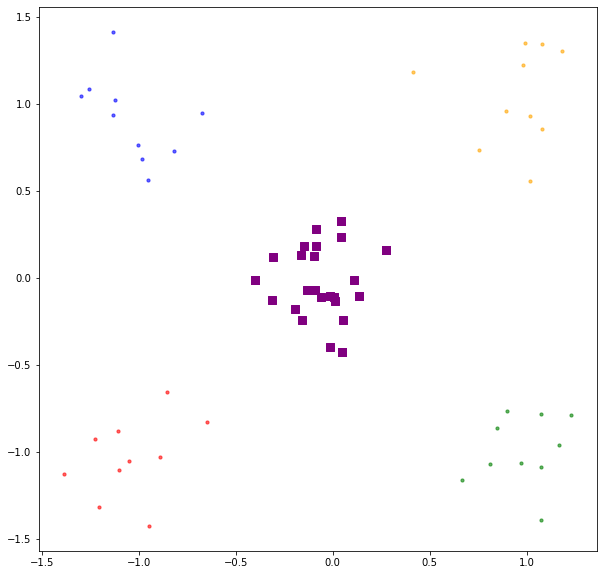

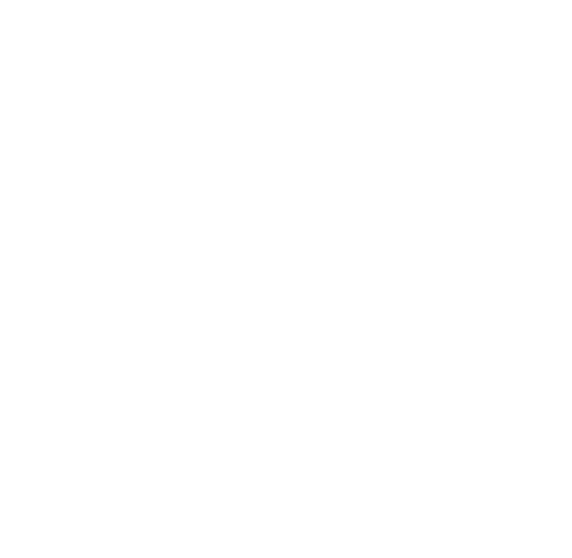

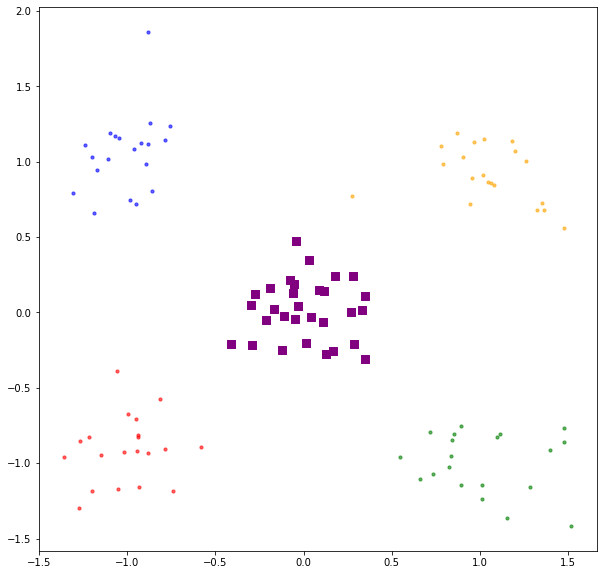

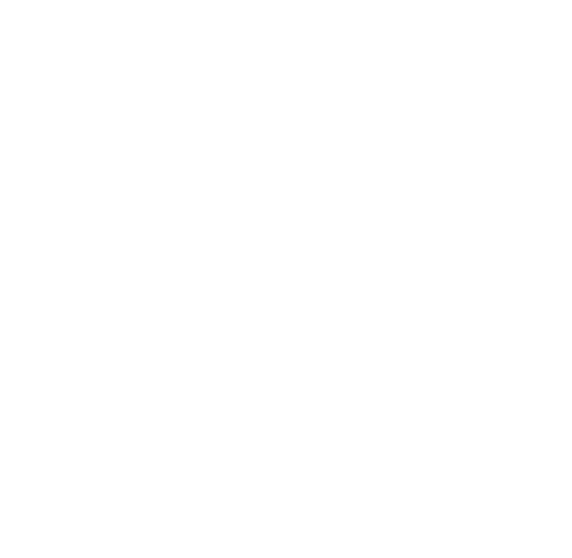

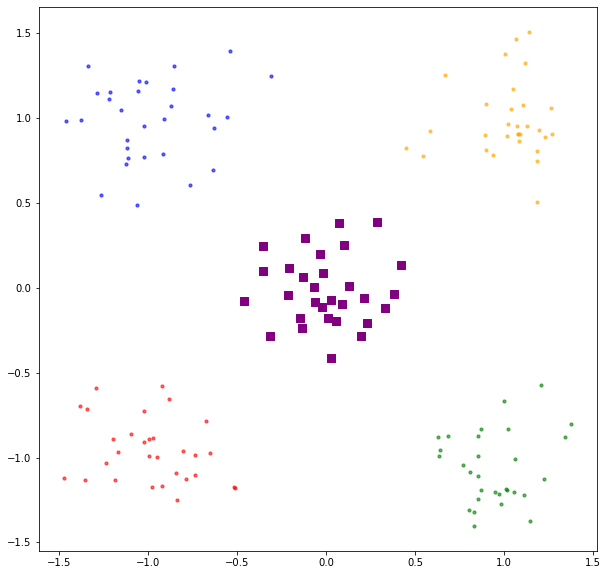

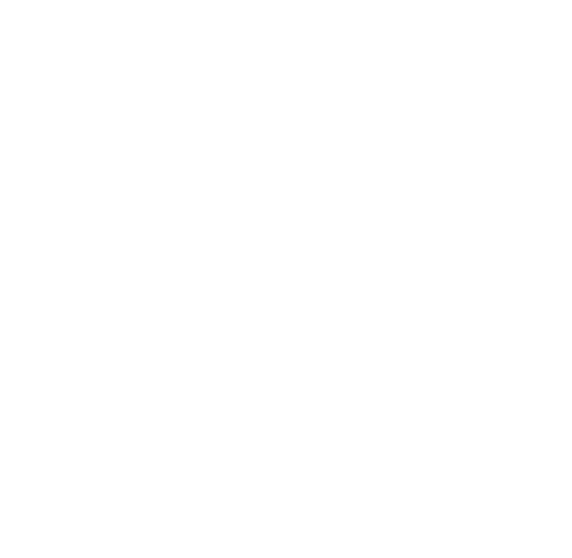

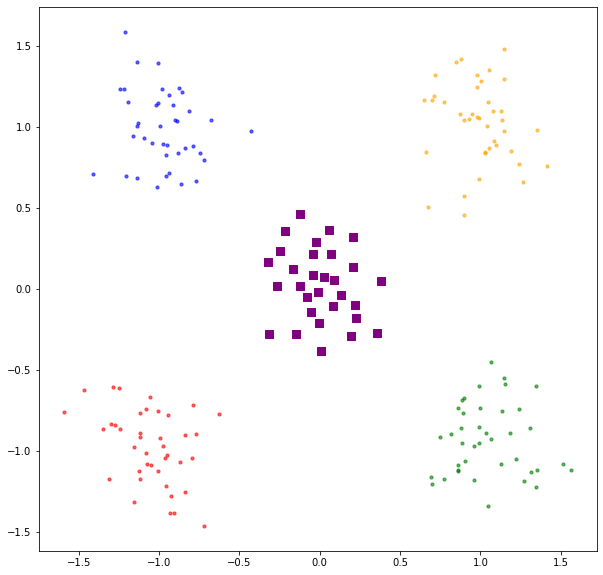

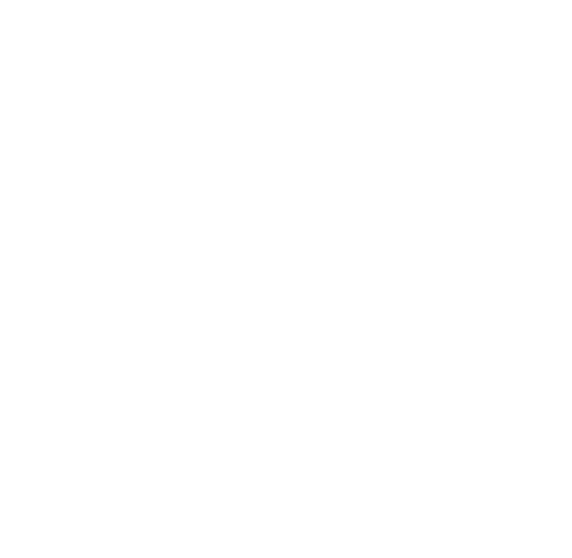

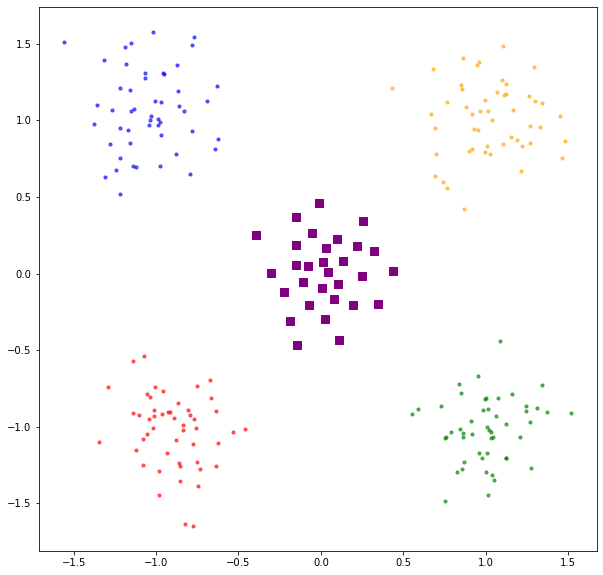

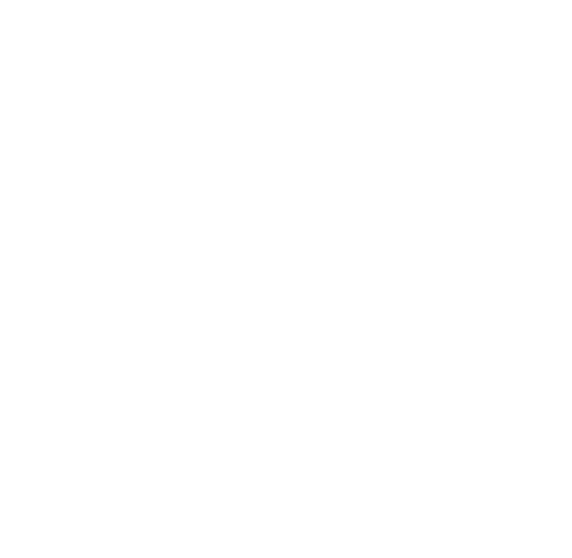

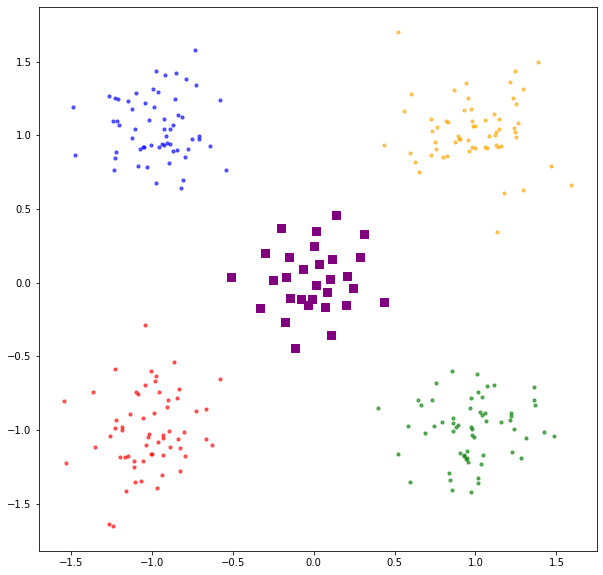

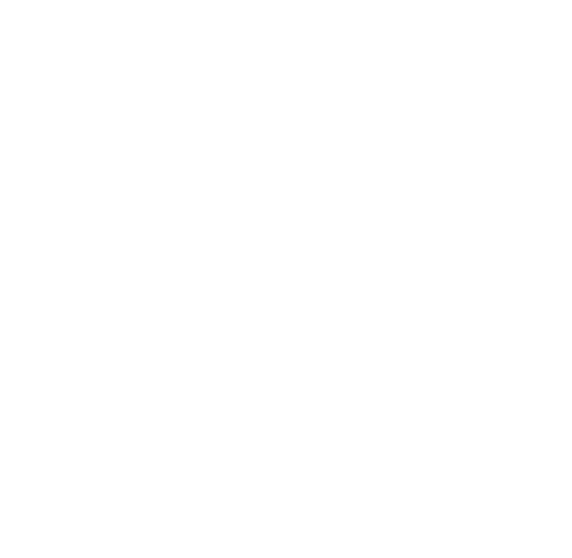

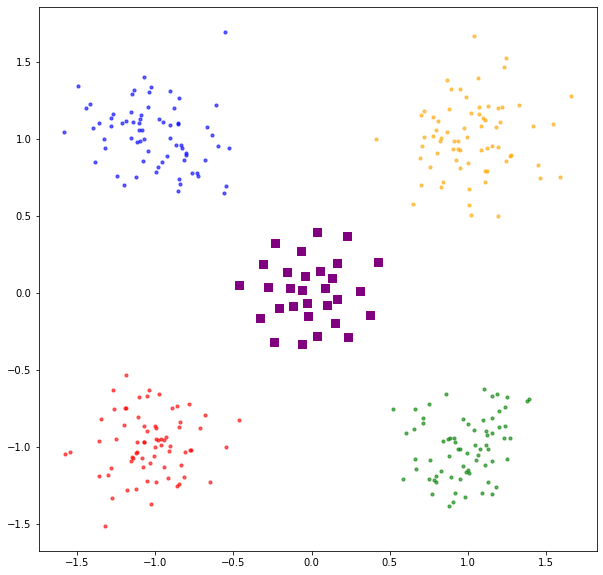

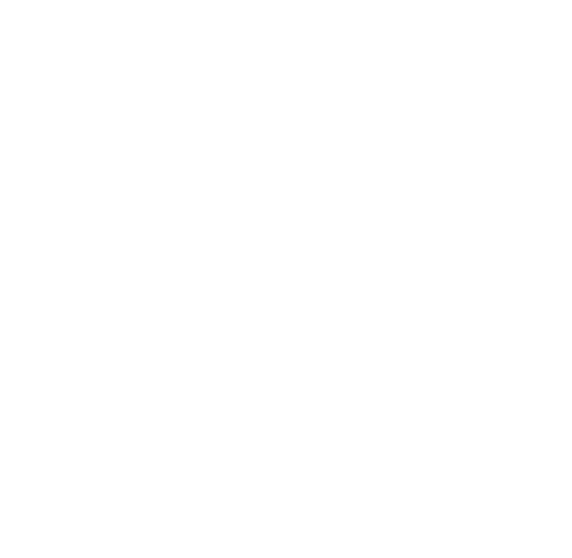

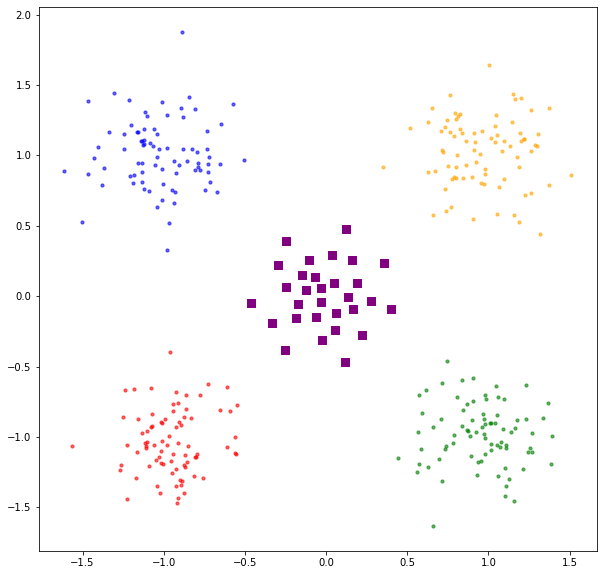

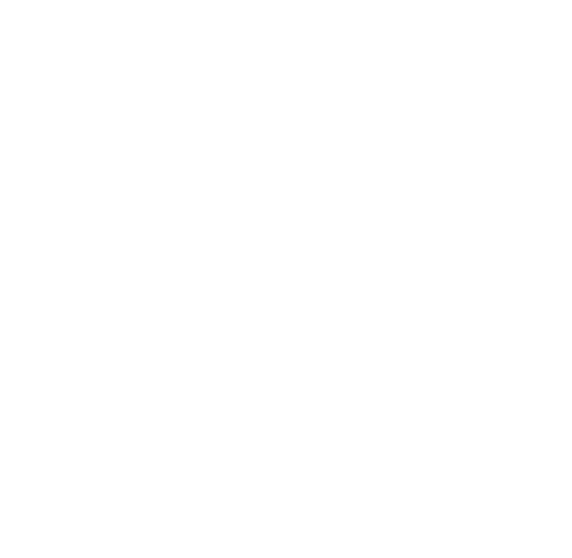

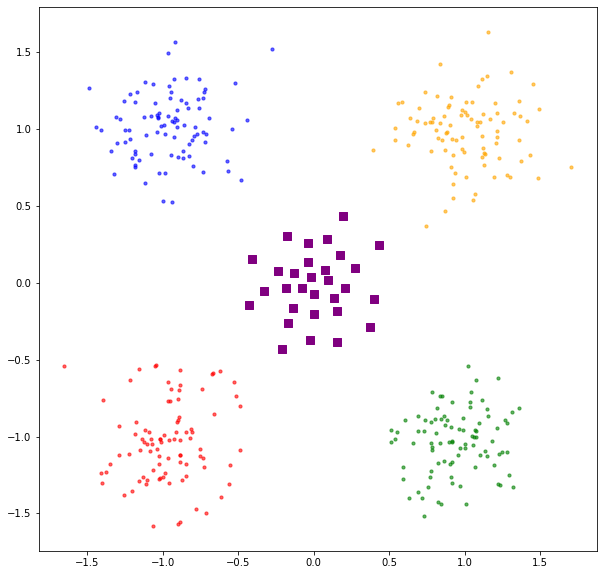

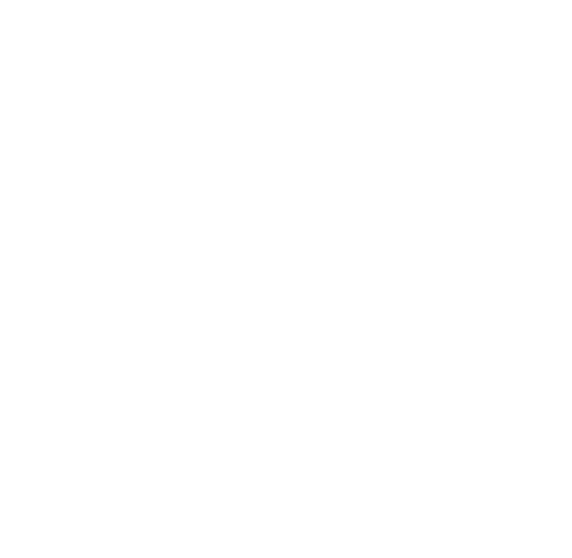

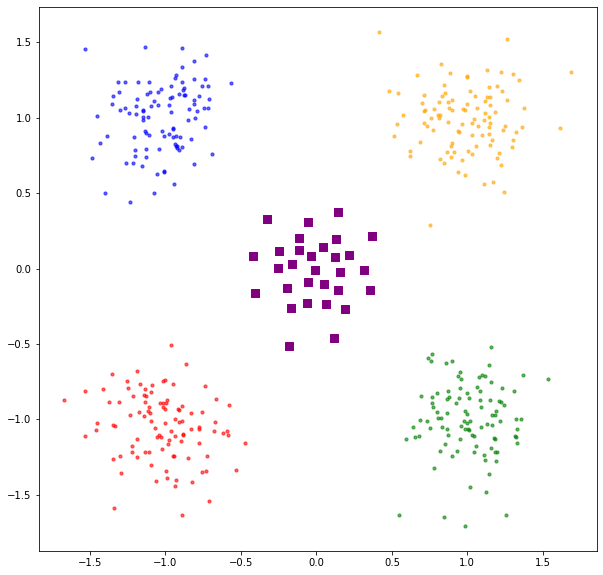

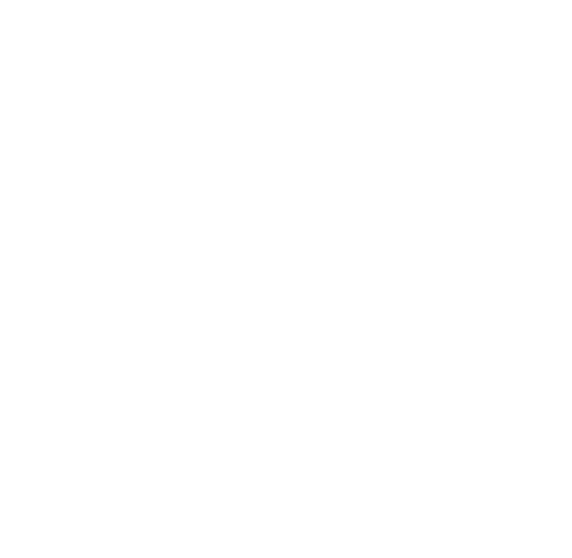

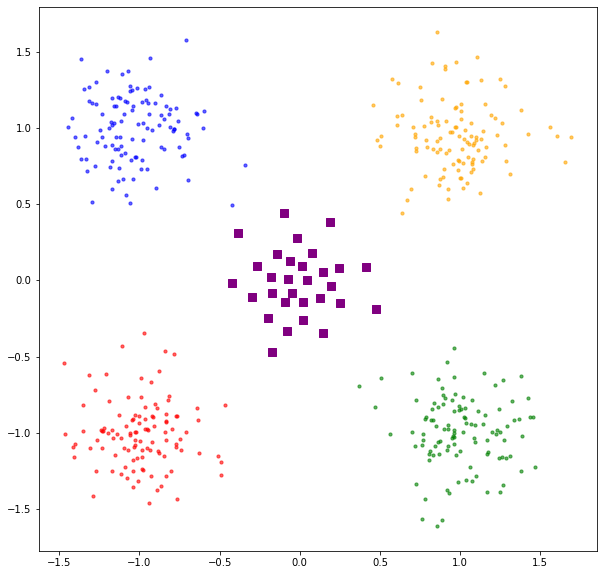

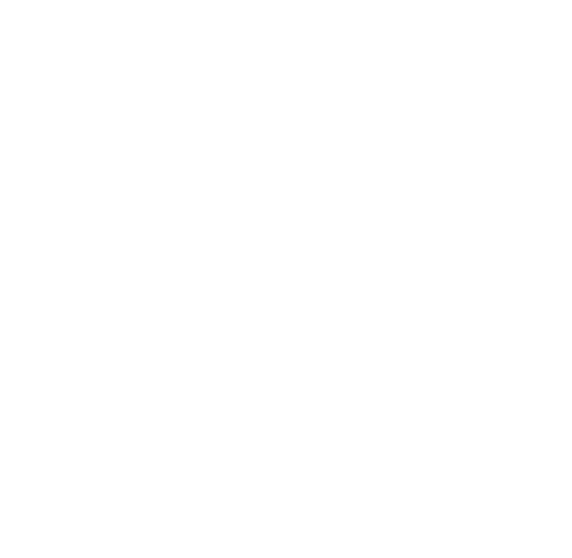

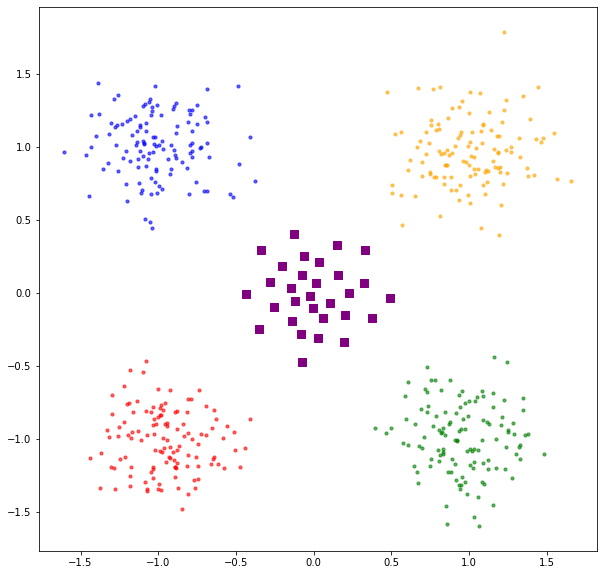

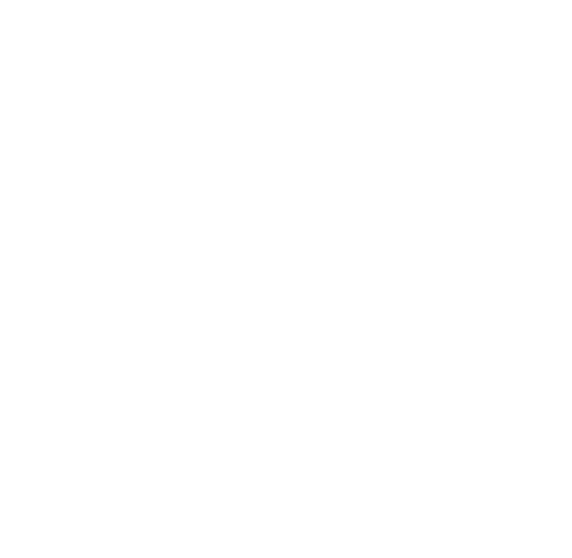

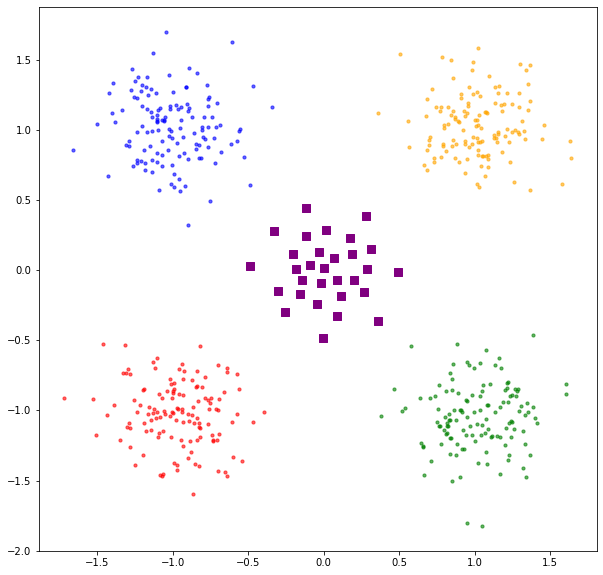

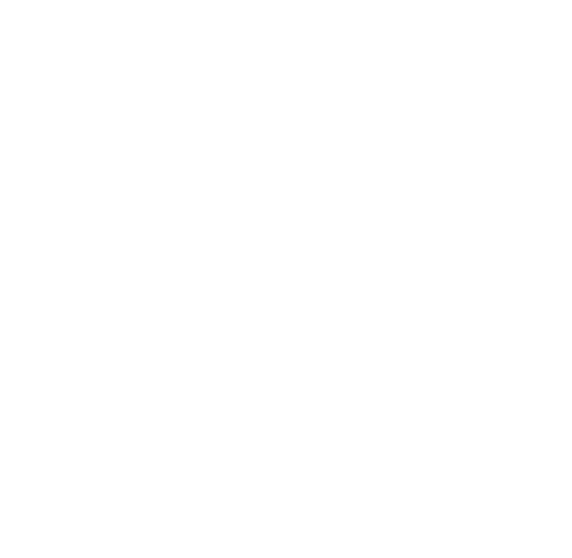

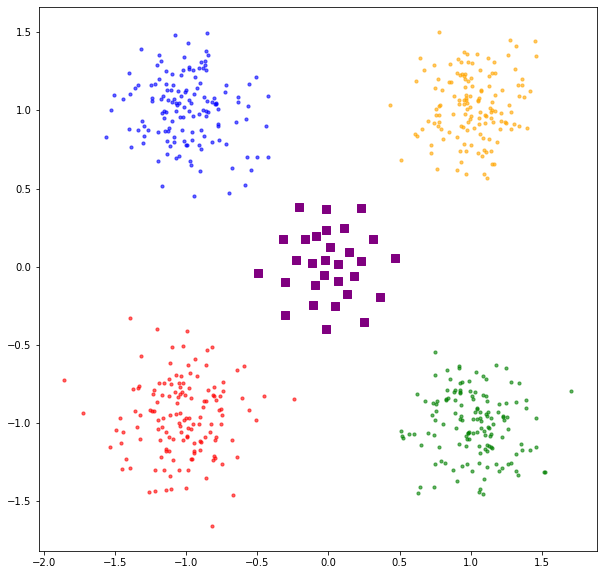

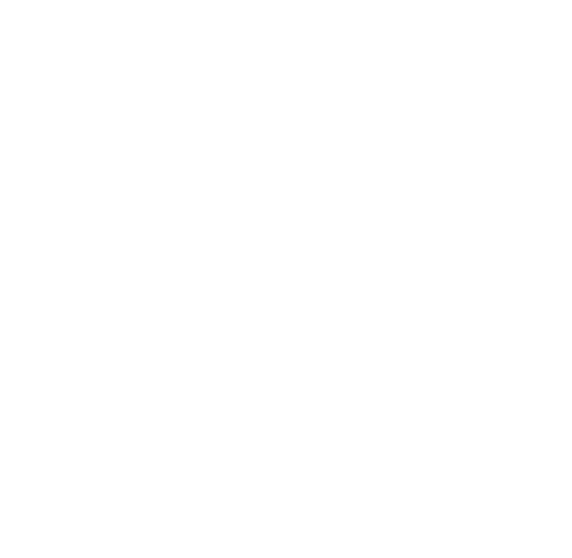

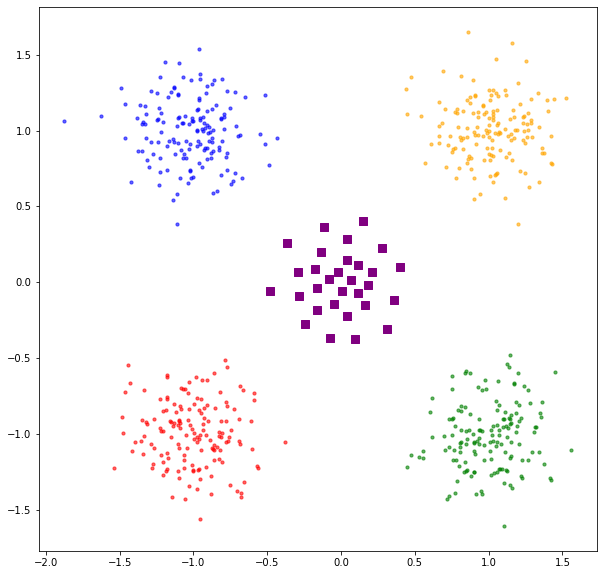

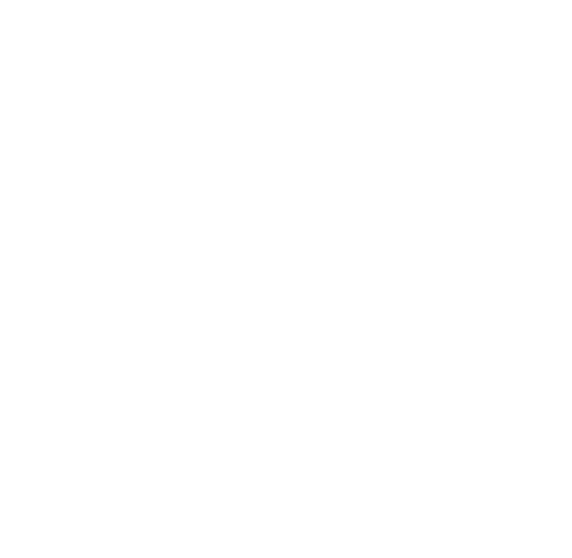

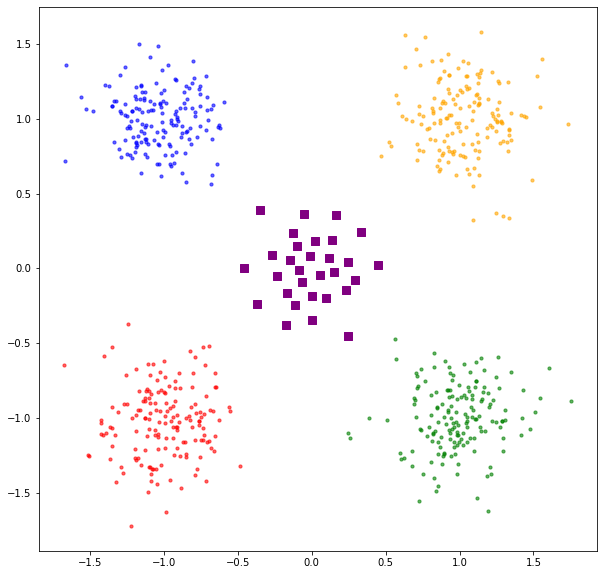

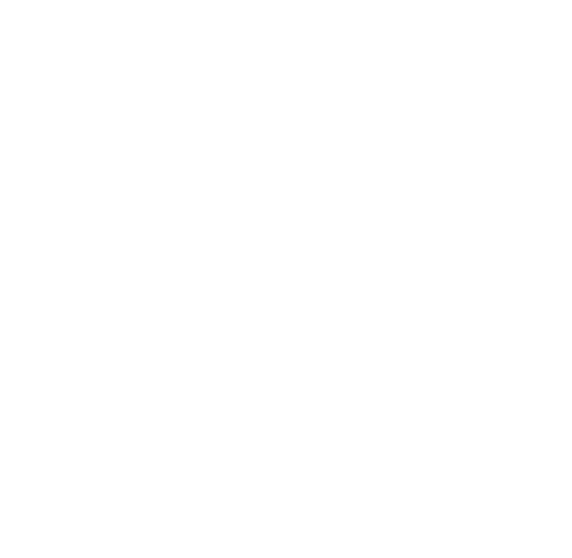

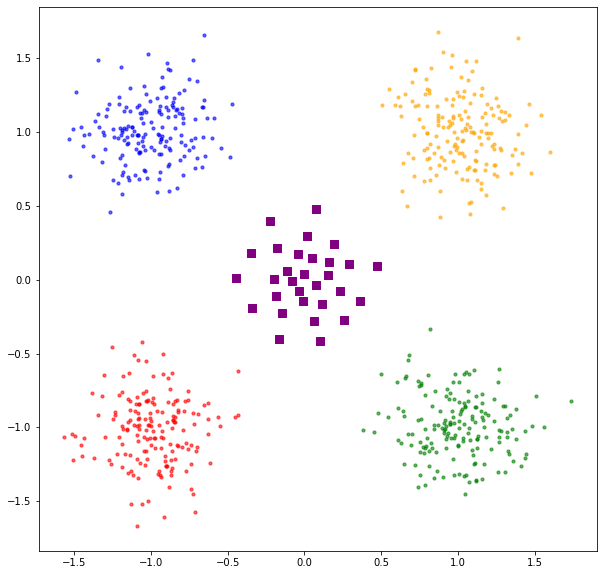

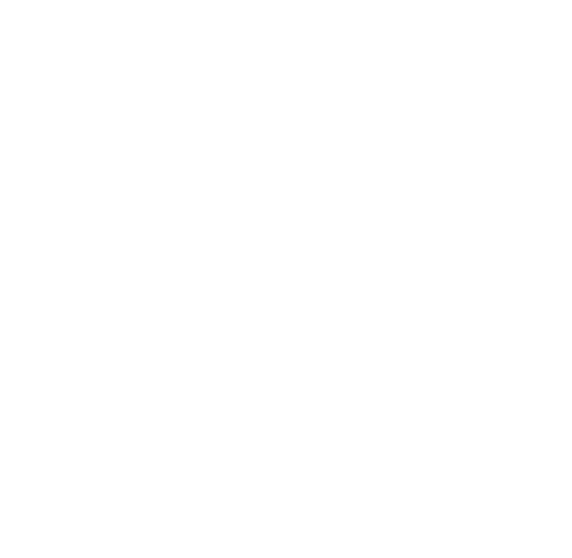

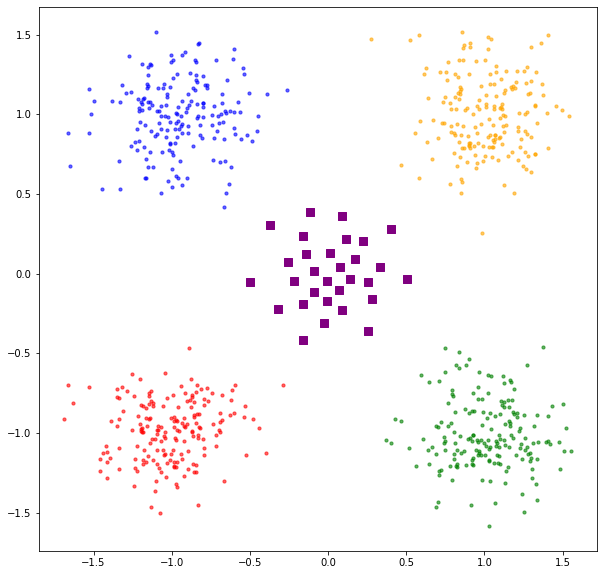

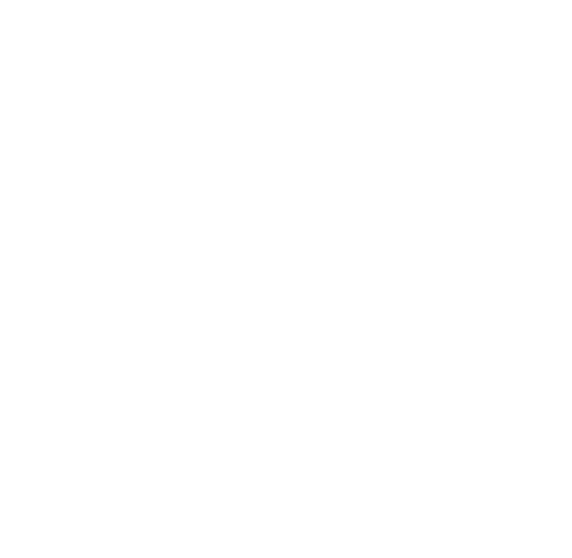

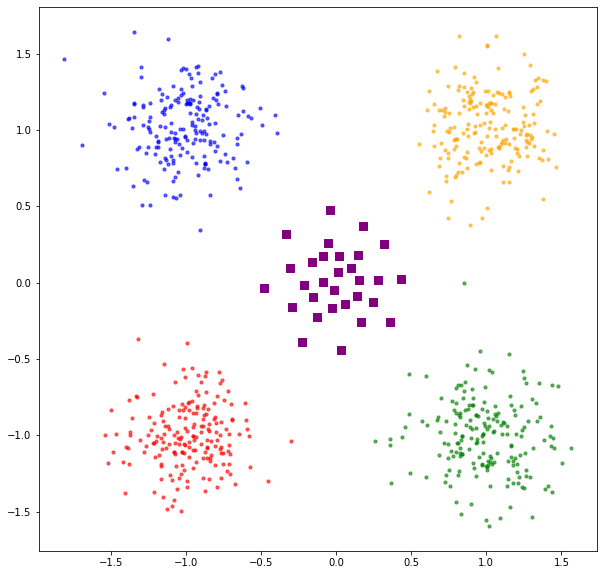

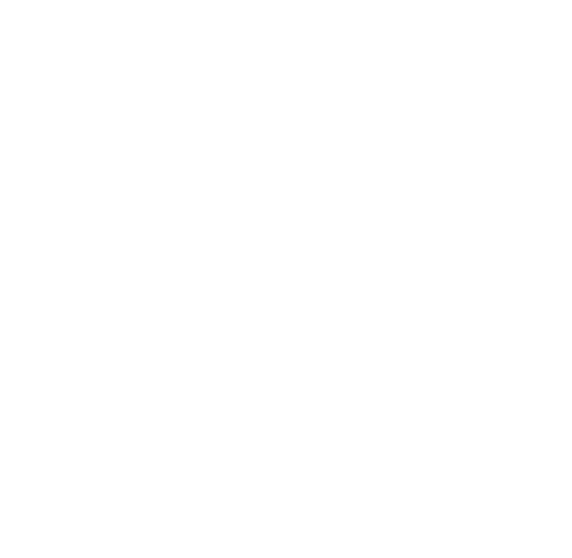

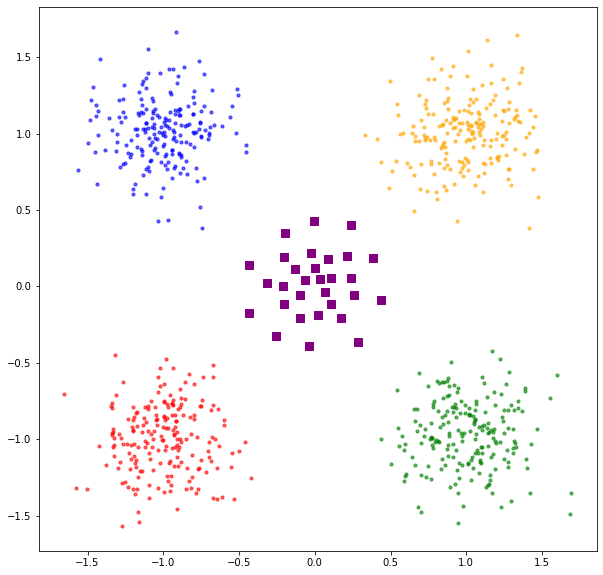

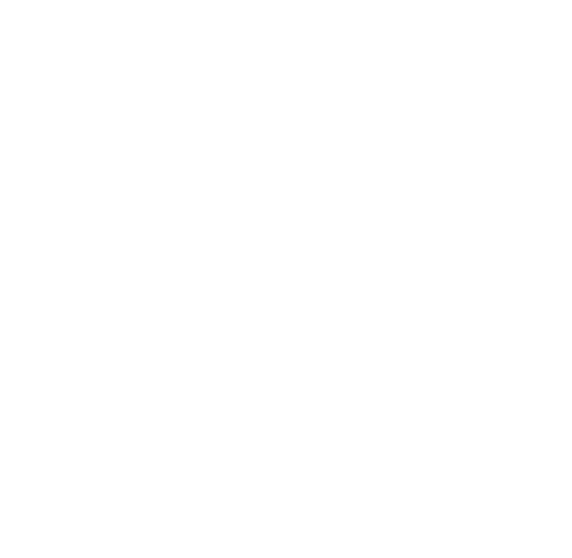

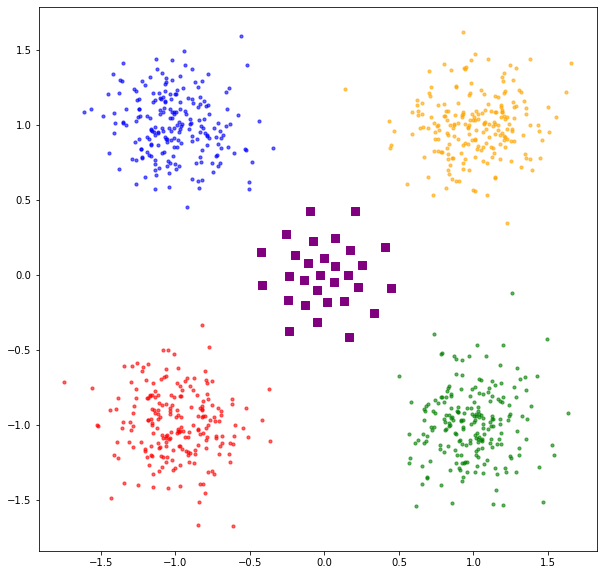

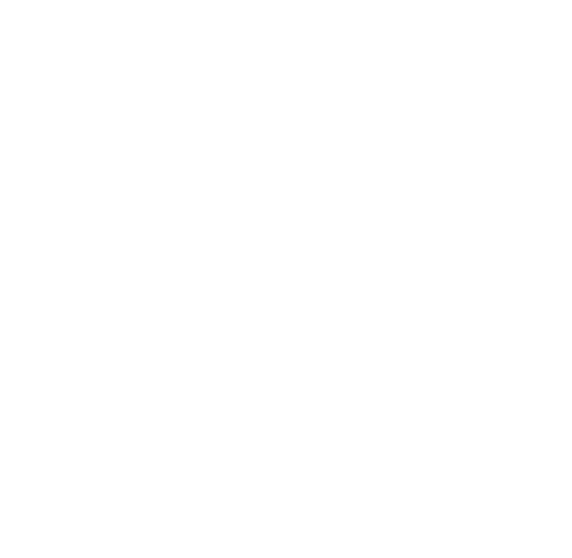

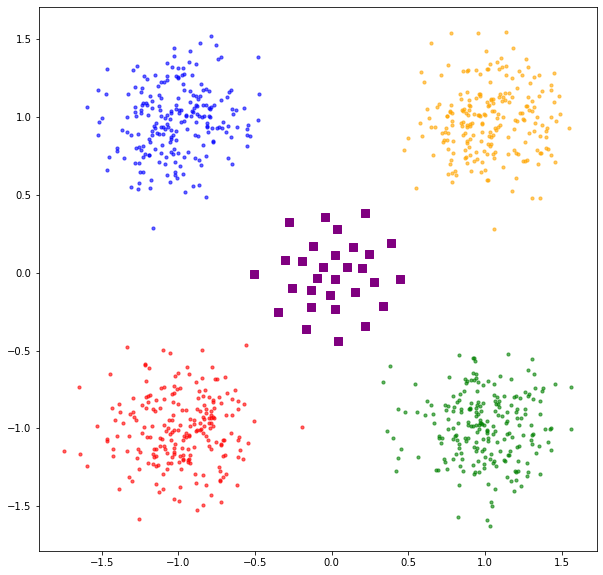

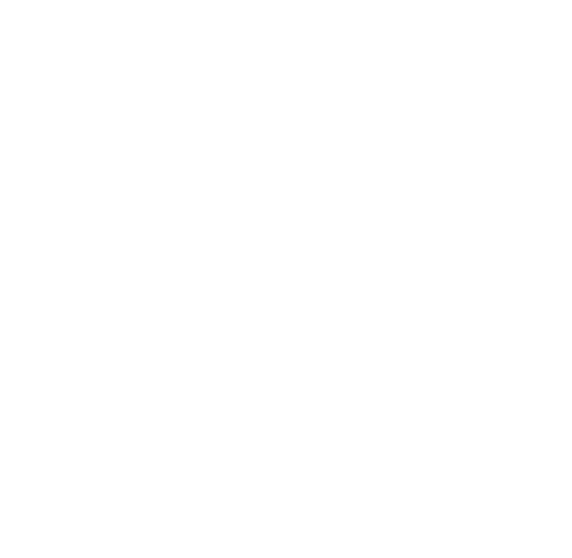

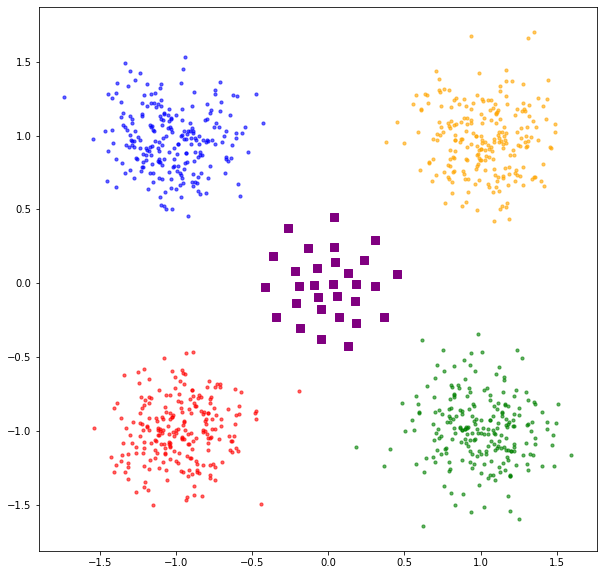

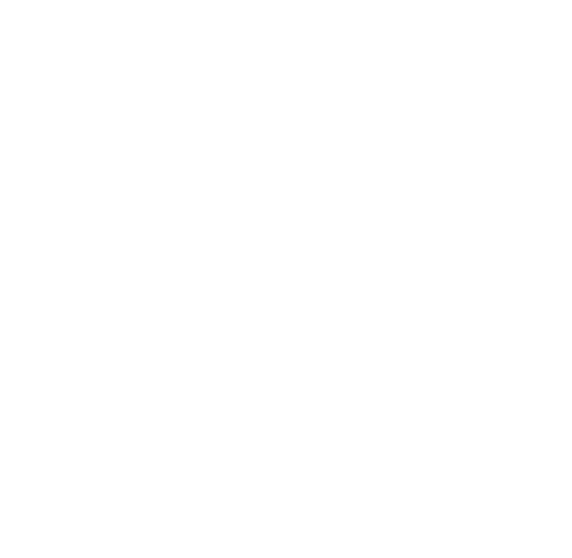

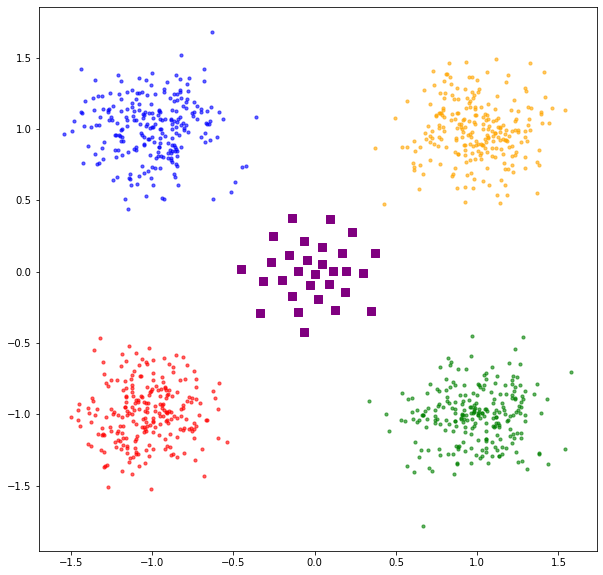

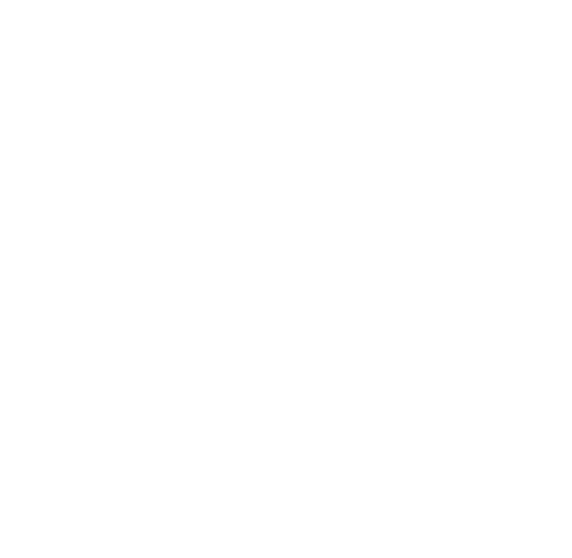

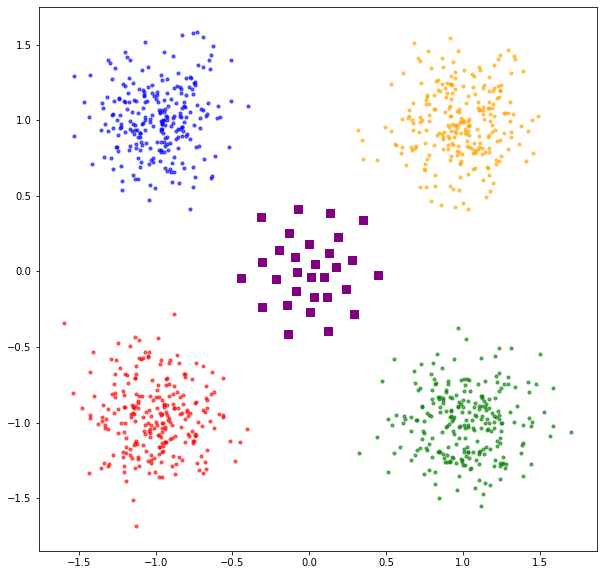

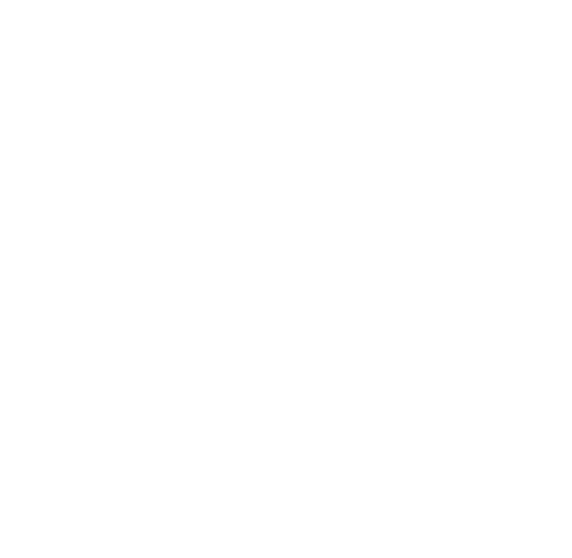

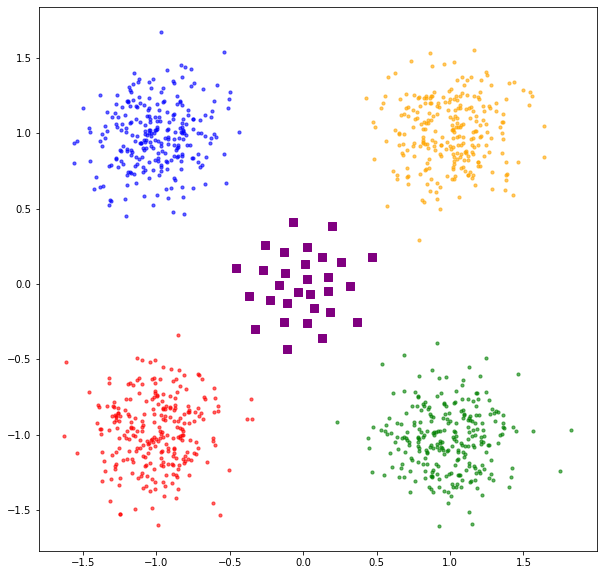

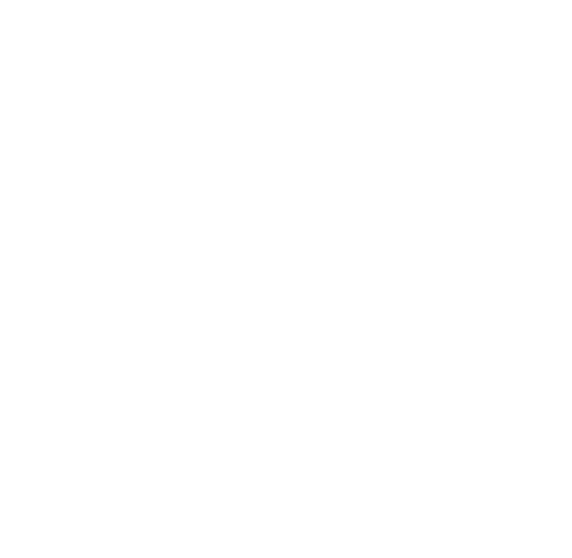

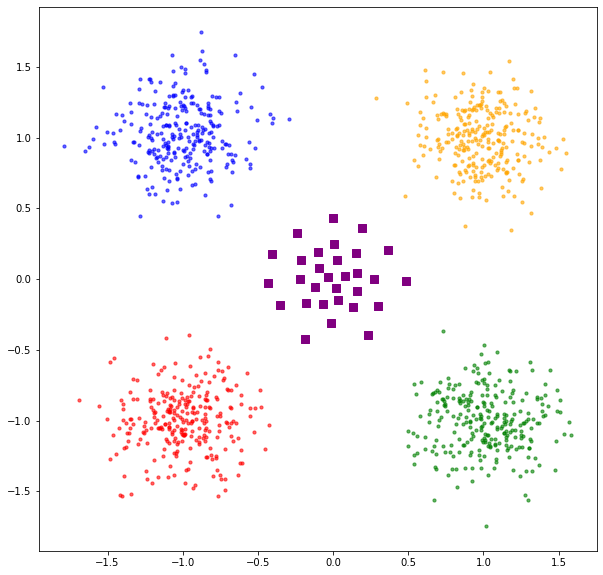

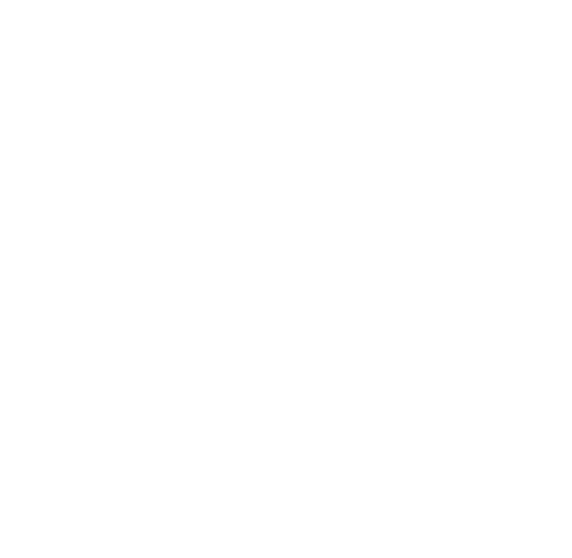

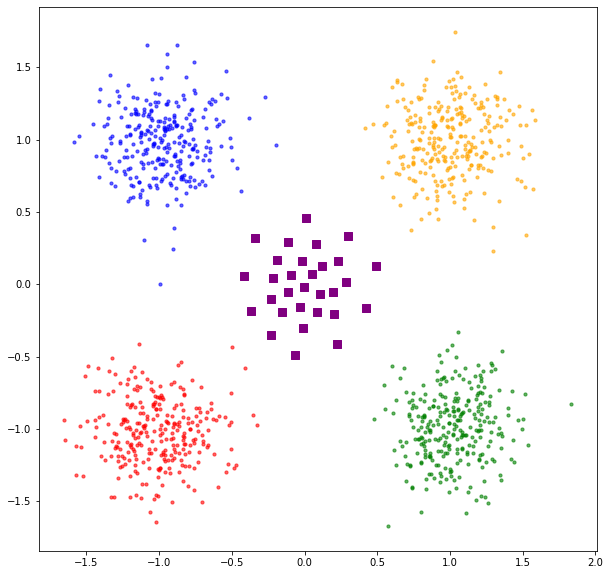

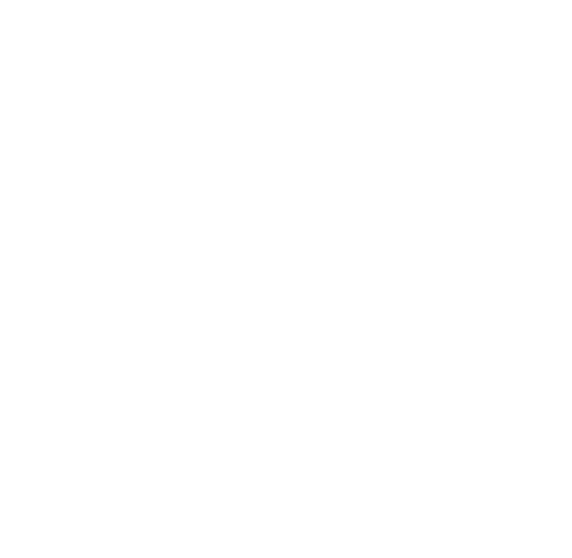

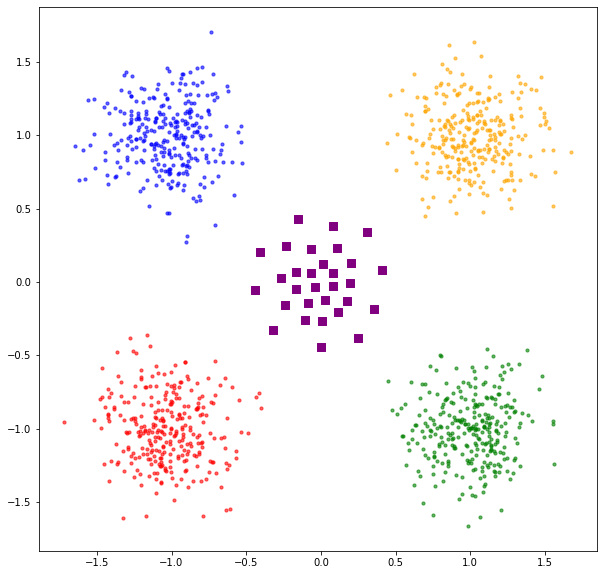

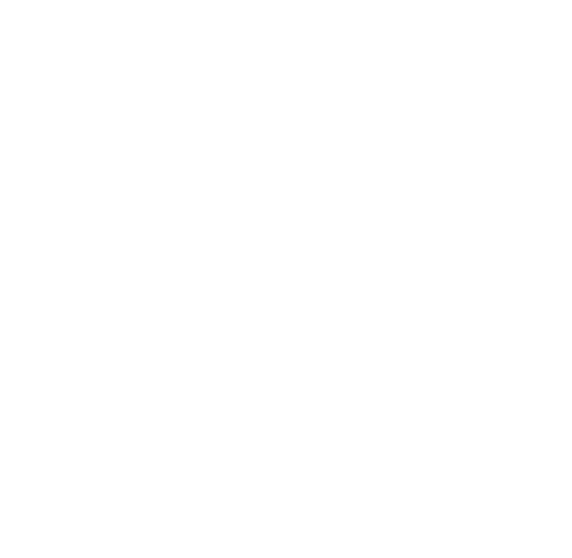

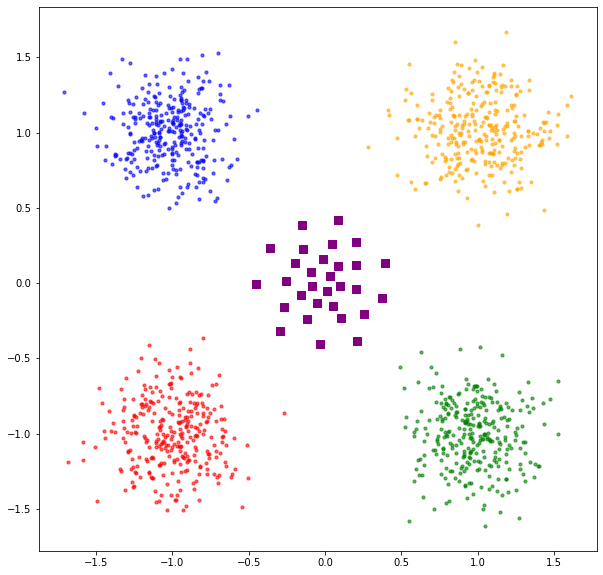

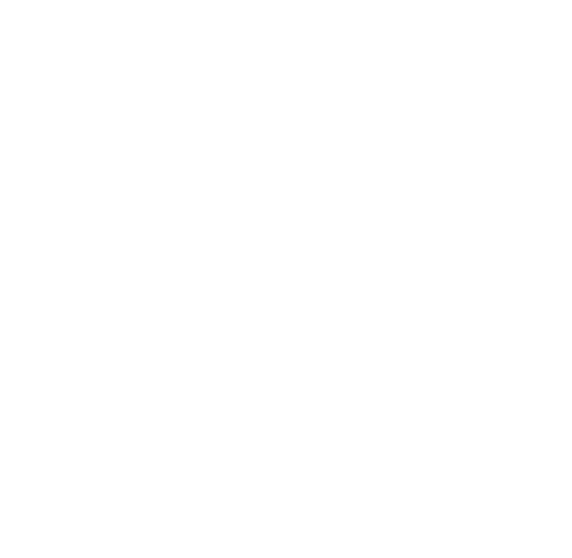

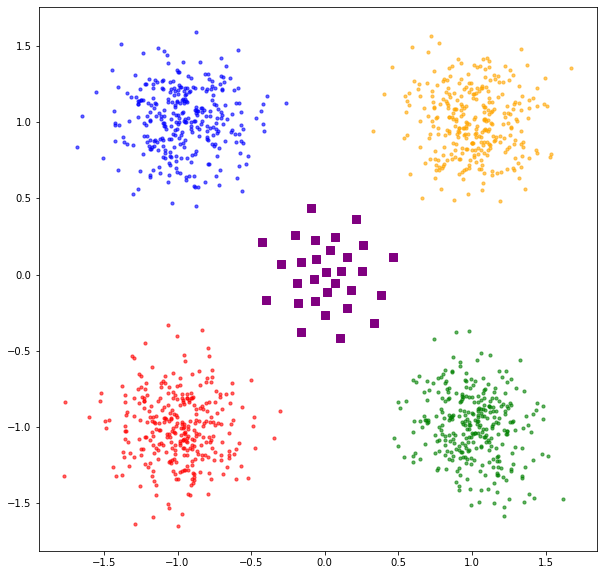

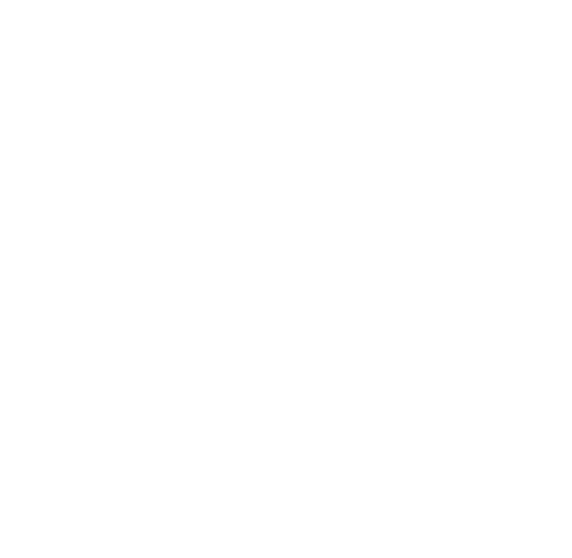

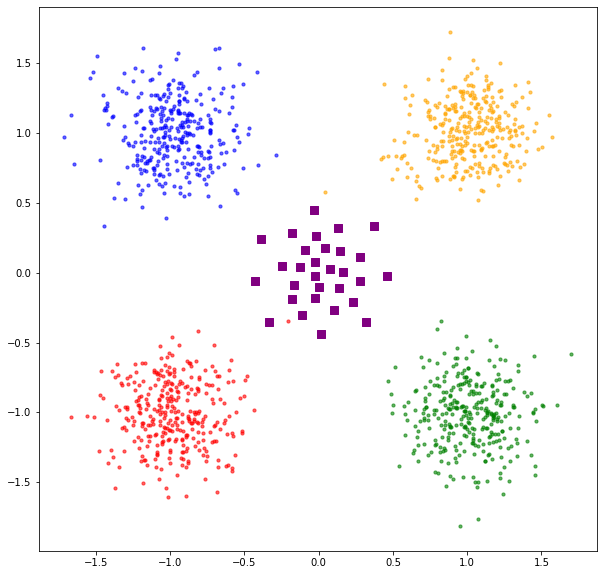

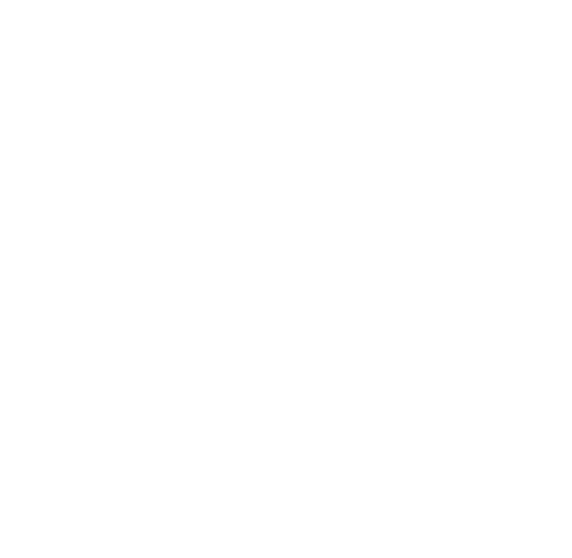

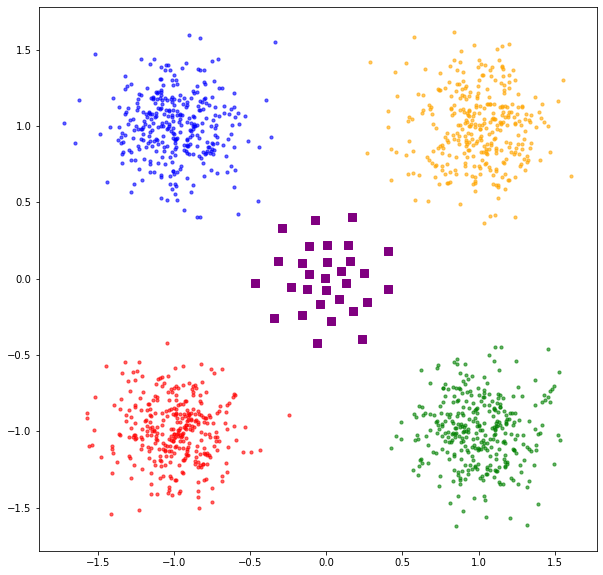

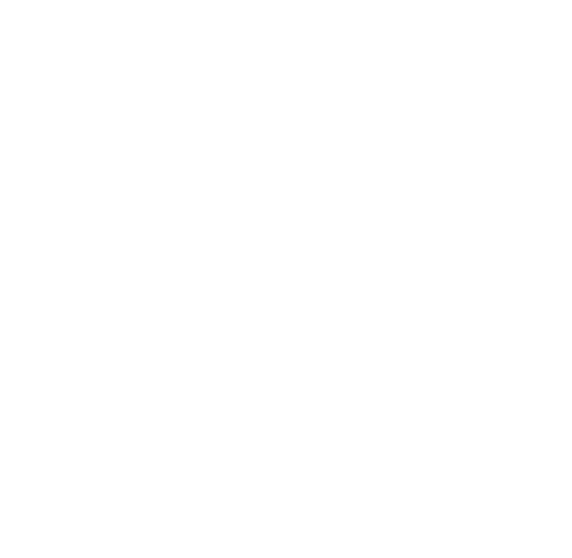

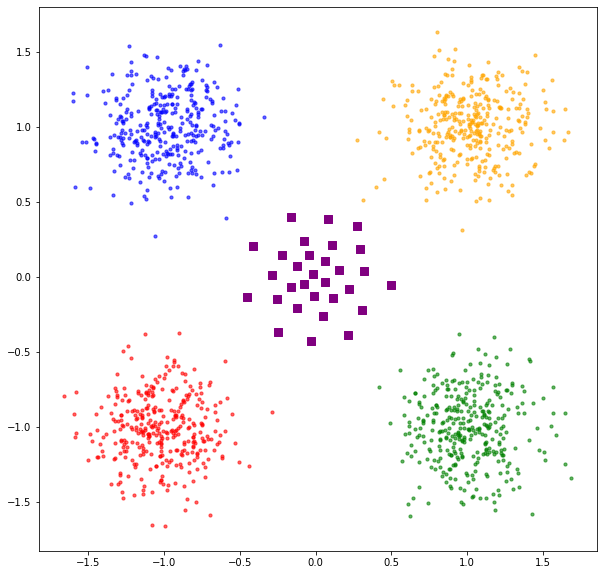

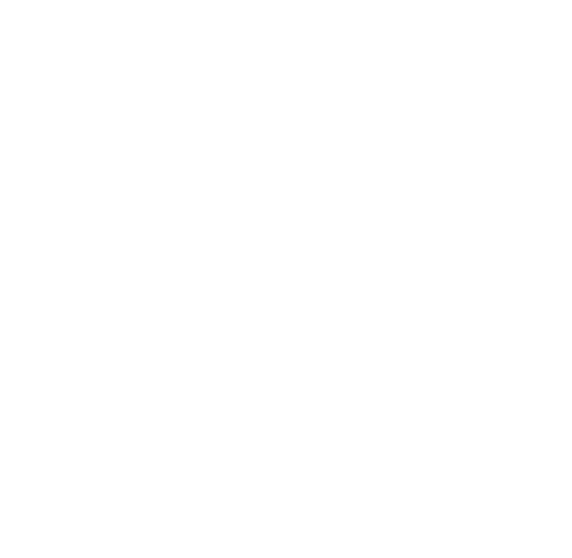

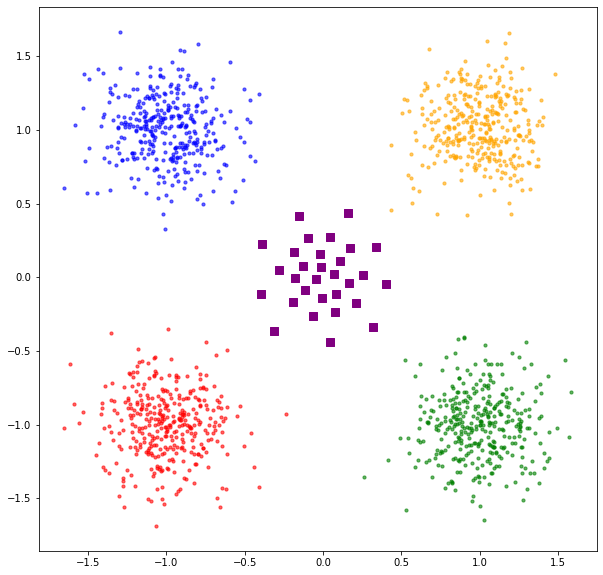

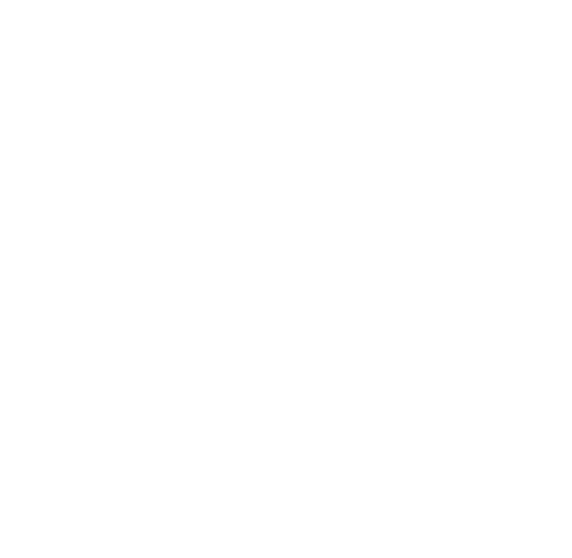

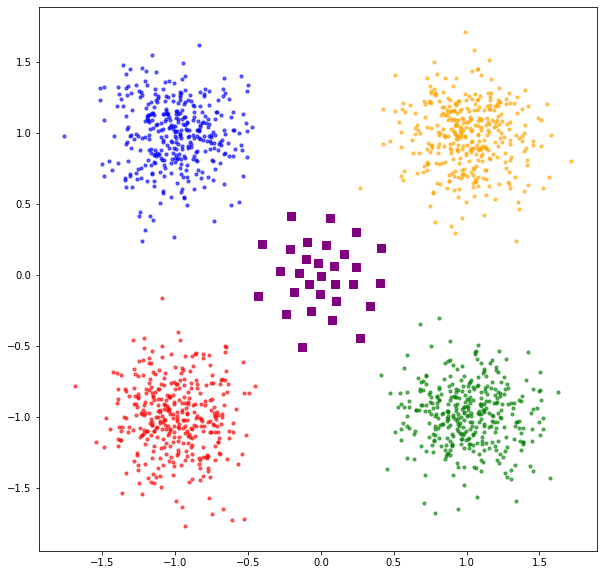

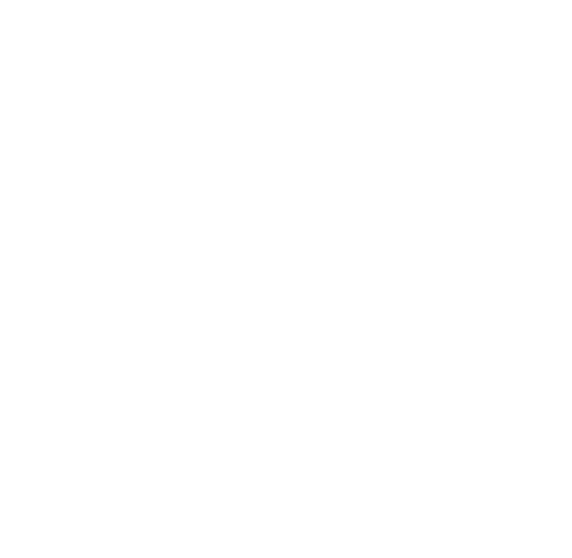

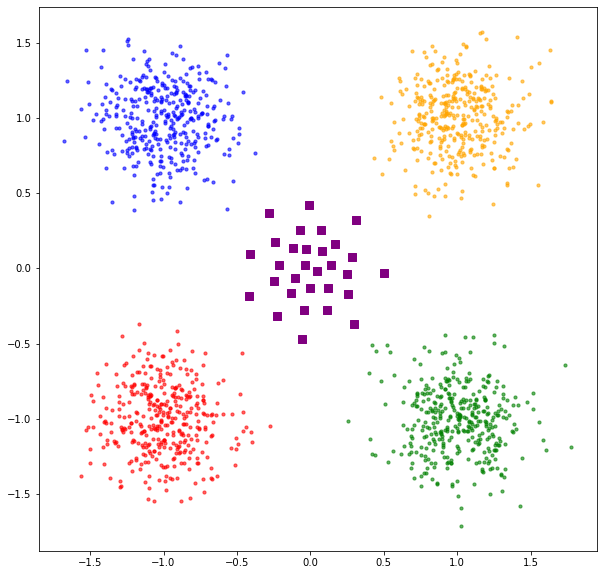

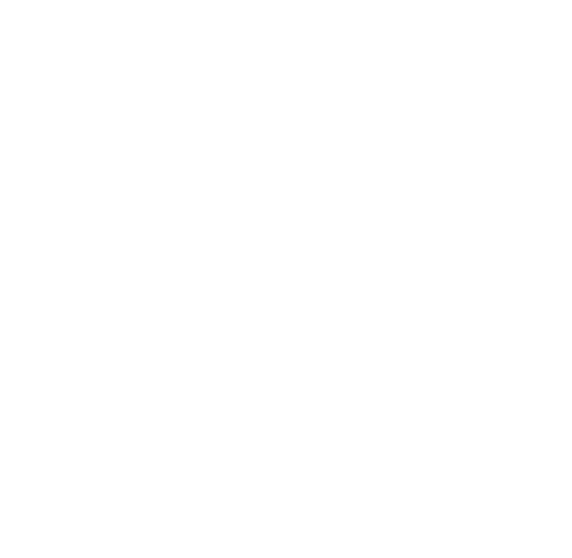

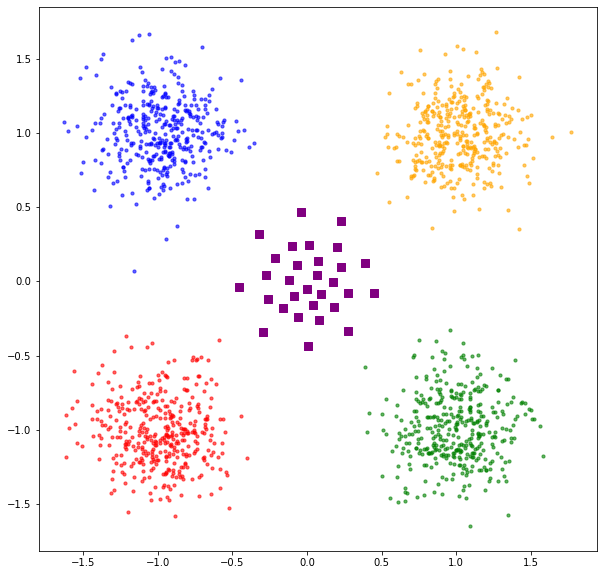

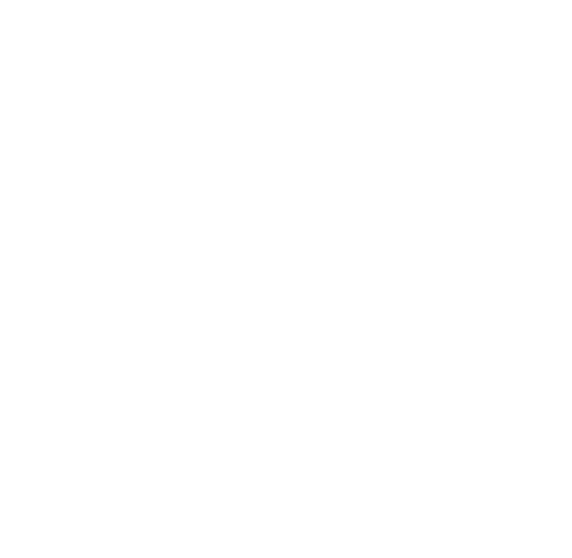

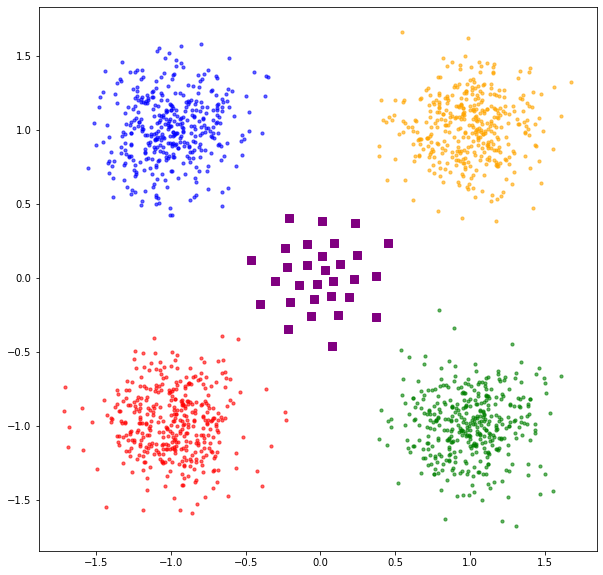

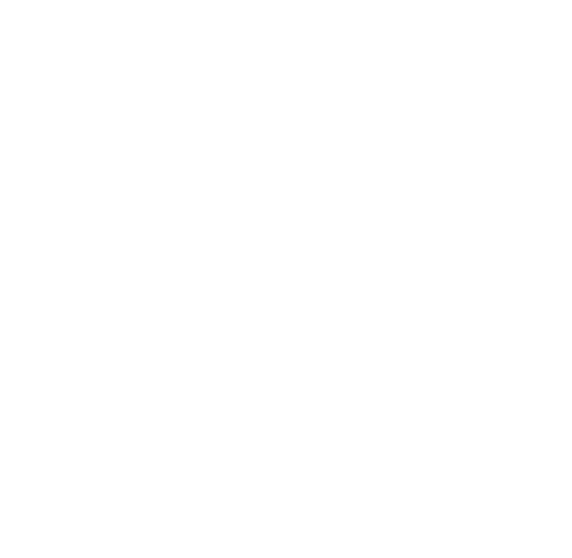

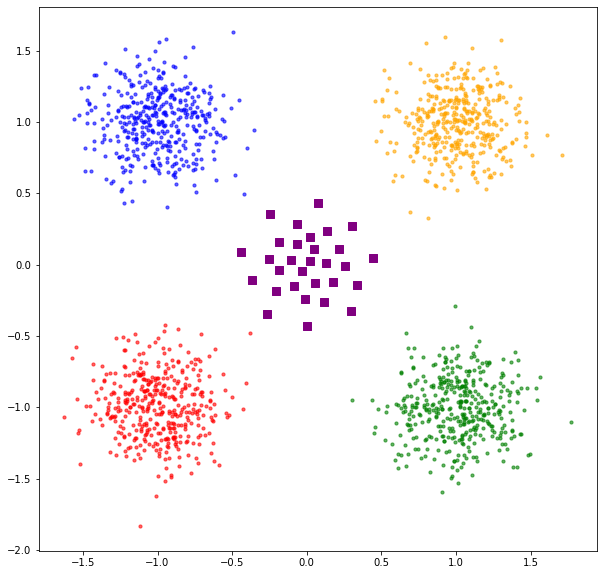

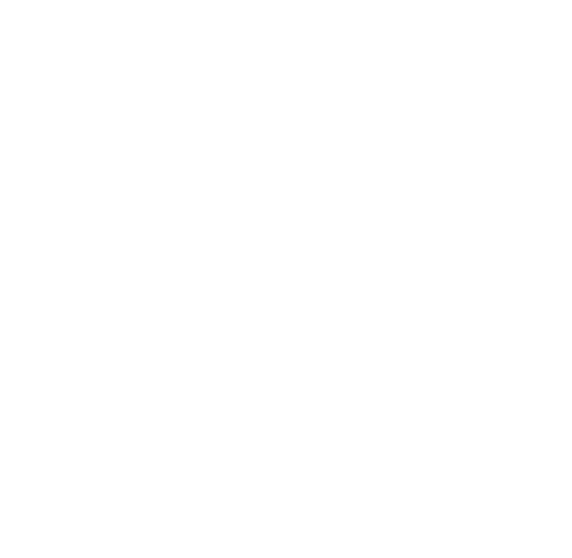

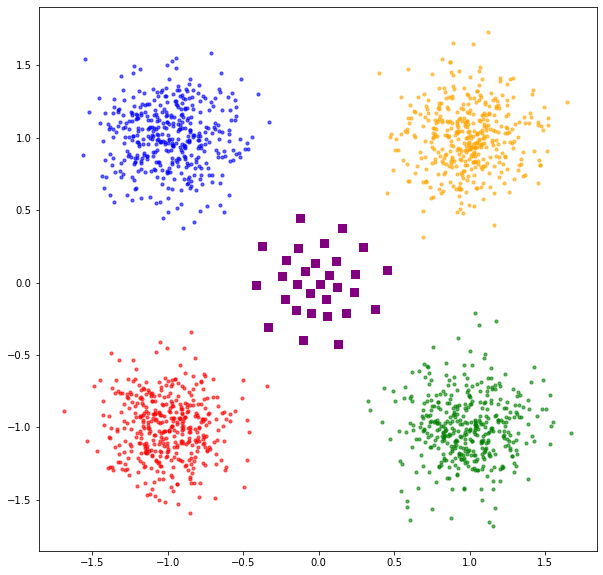

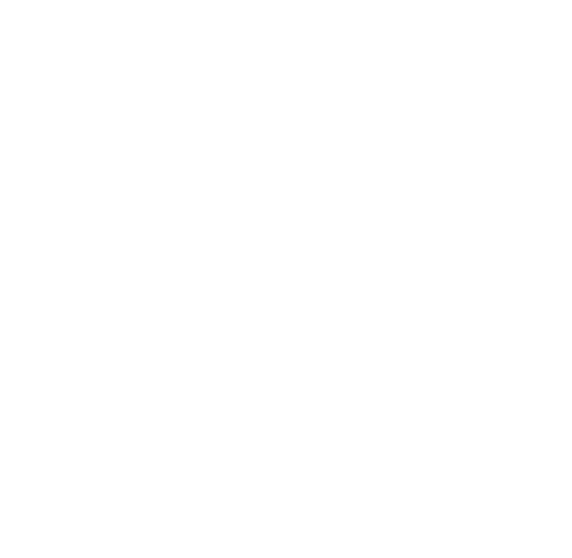

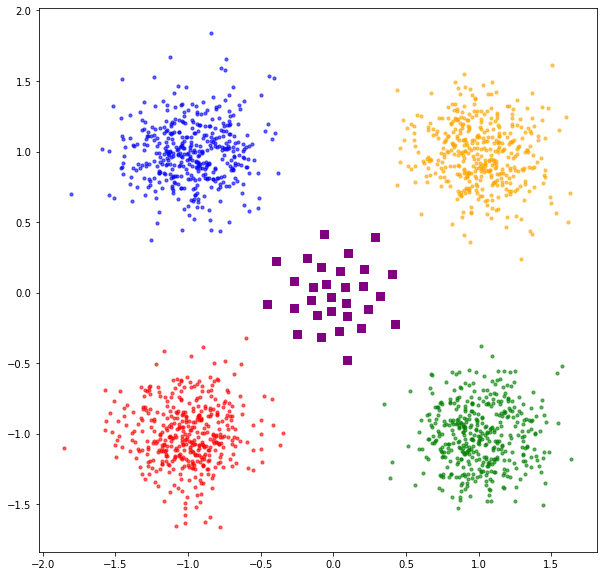

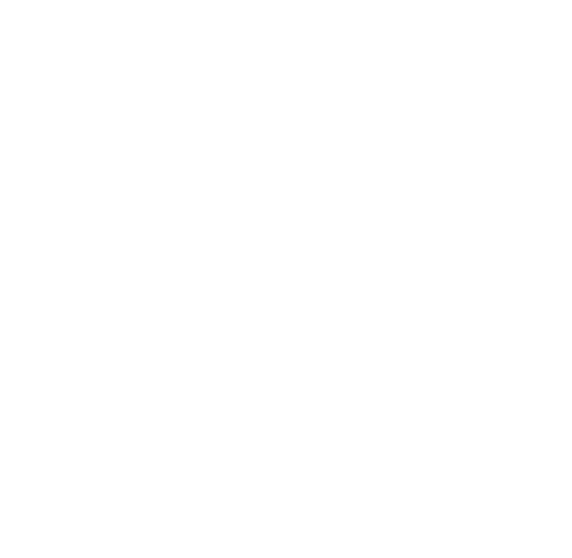

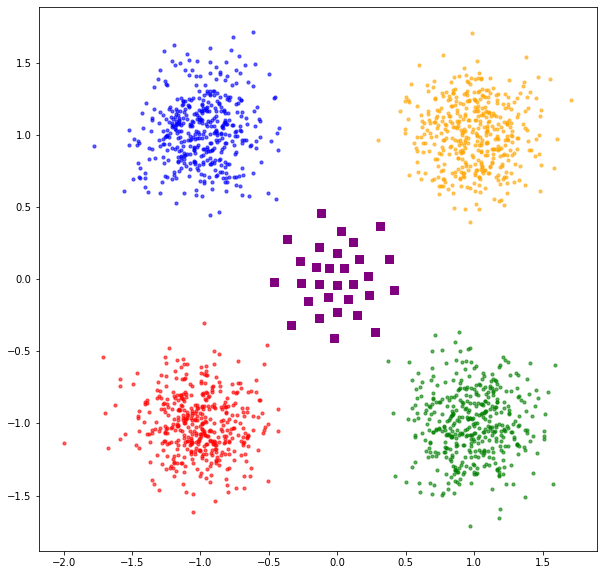

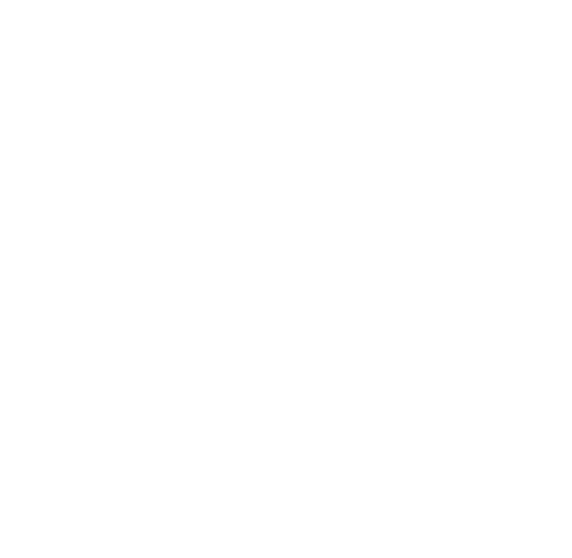

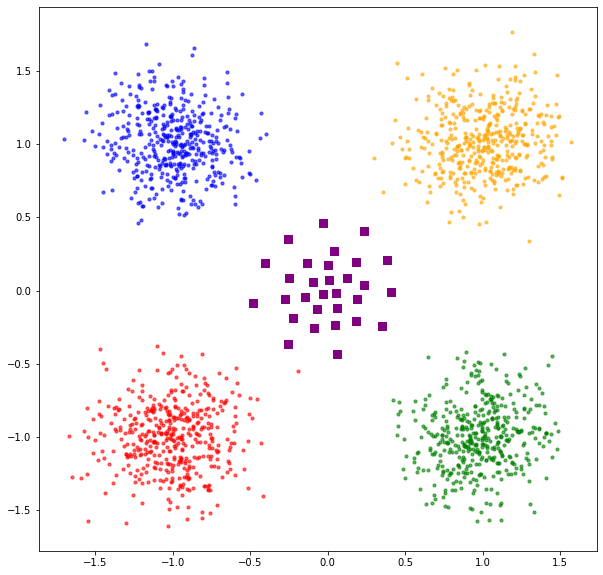

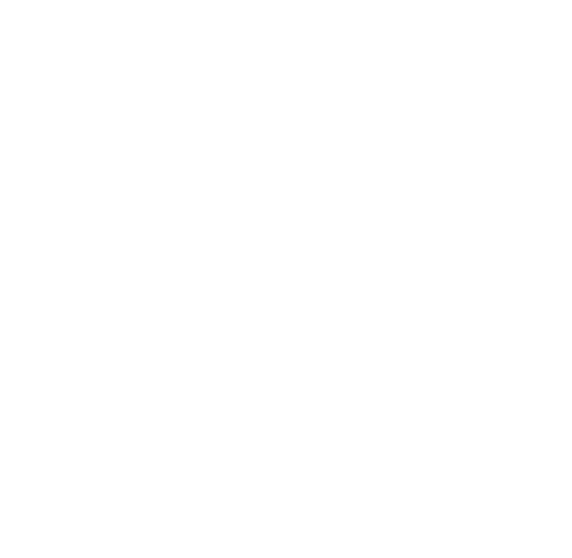

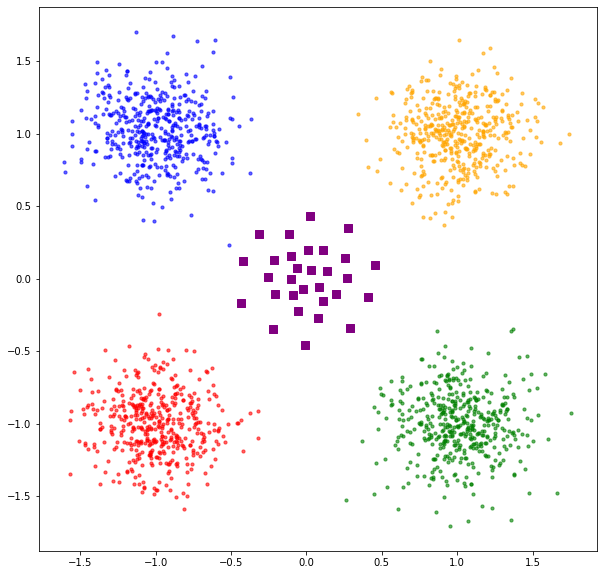

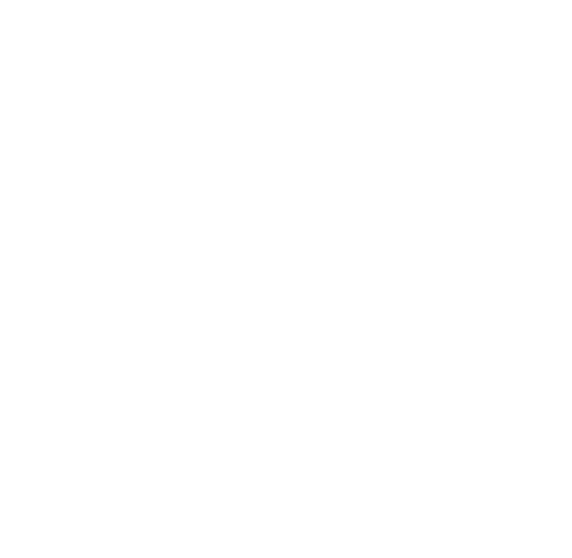

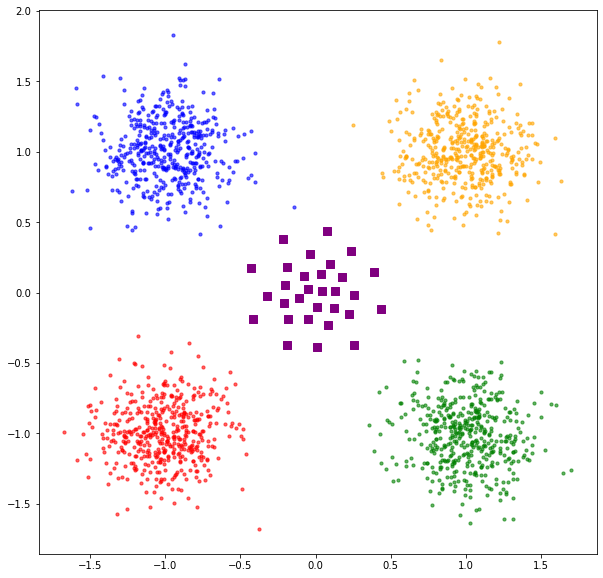

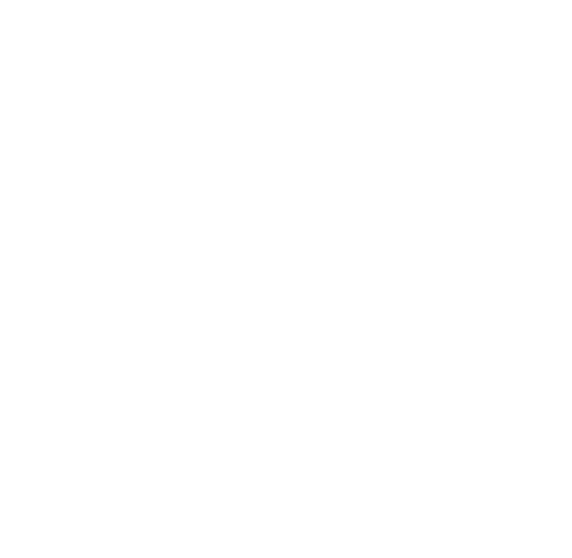

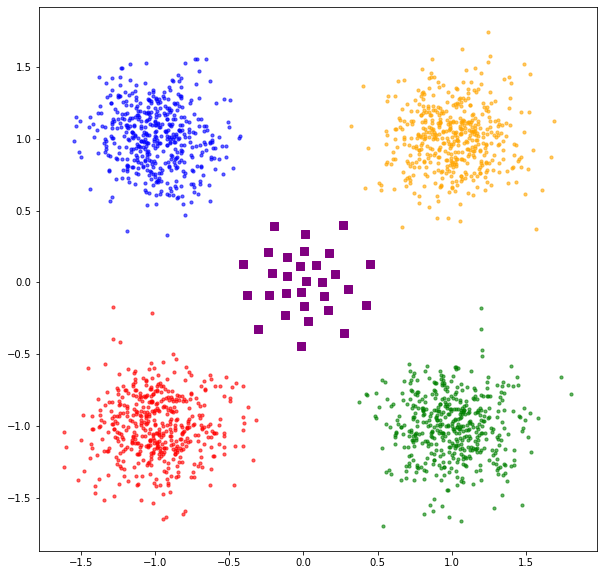

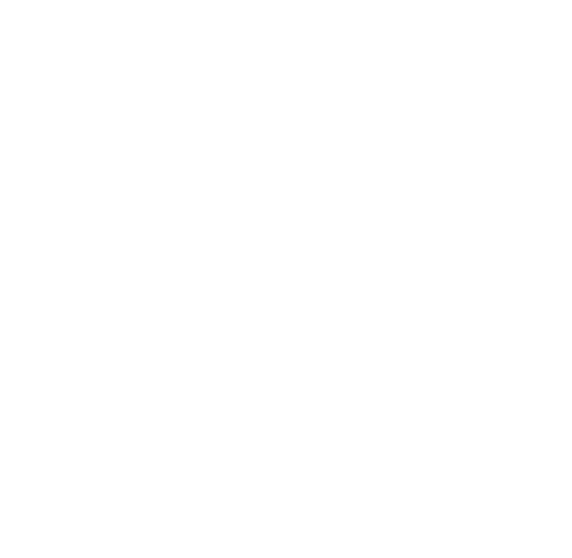

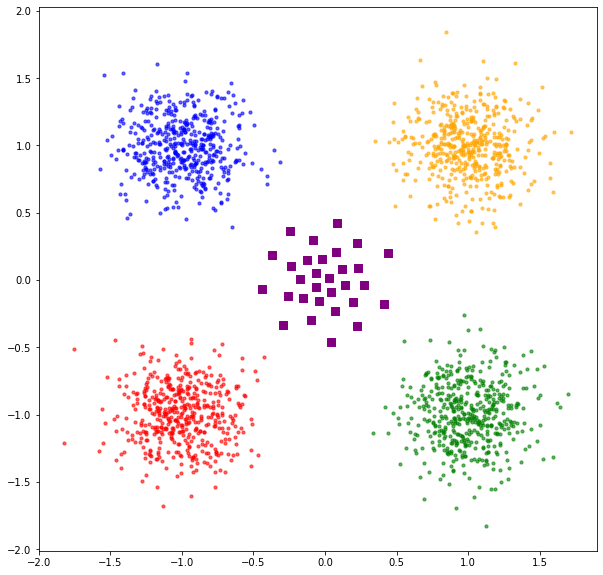

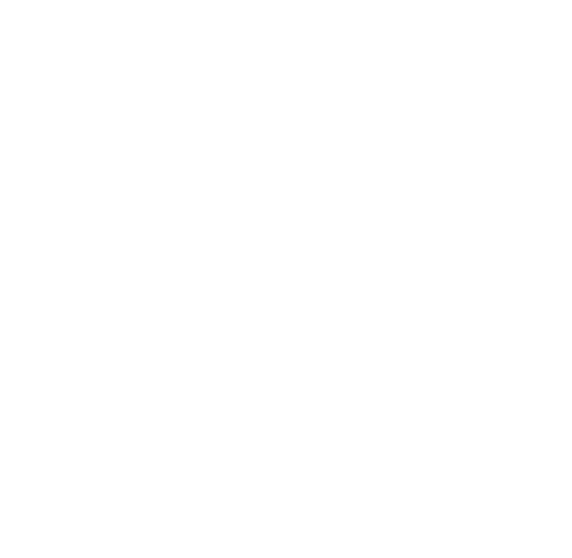

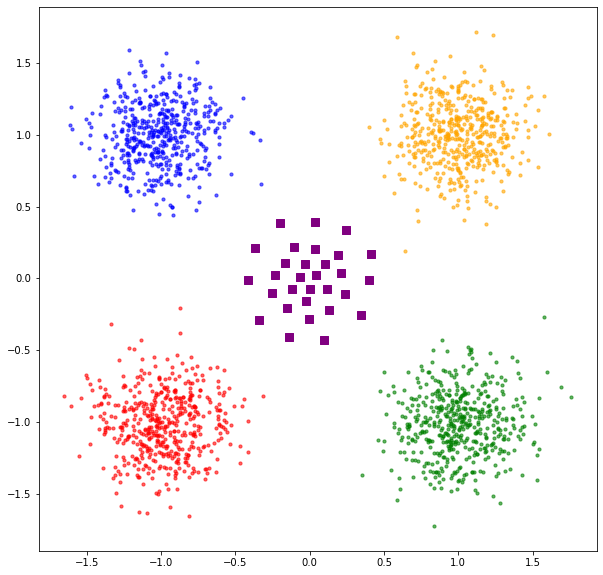

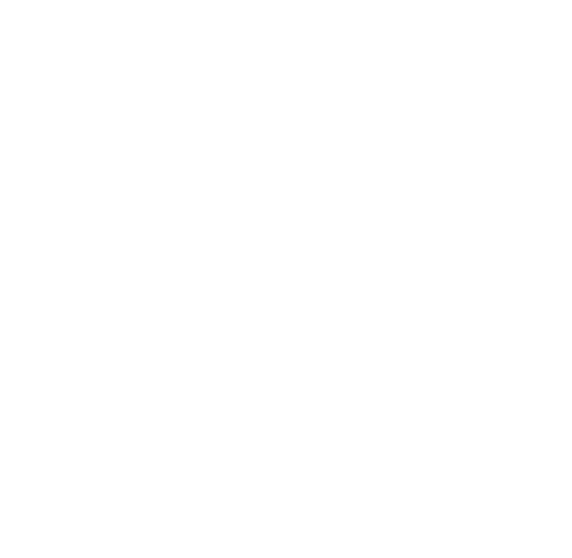

In [46]:
np.random.seed(42)
N=30 #Sparsity level of the barycenter
colors = ['red', 'blue', 'green', 'orange']

means = [(-1, -1), (-1, 1), (1, -1), (1, 1)]
cov = [[0.05, 0], [0, 0.05]] 

Rng=range(10,500,10)
for n in Rng:
    samples = []
    labels = []
    X=[]
    for i, mean in enumerate(means):
        points = np.random.multivariate_normal(mean, cov, n)
        samples.append(points)
        labels.append(np.full(n, i))
        X.append(points)#This list contains the target measures
    samples = np.vstack(samples)
    labels = np.concatenate(labels)
    Y_0=np.random.normal(0.0, 1.0, (N, 2))#Initialisation of the sparse barycenter
    weights = [np.ones(n)/n for _ in range(4)] #weight associated to each atoms of the target measures
    S = ot.lp.free_support_barycenter(X, weights, Y_0, np.ones(N)/ N) # Computation of the barycenter

    plt.figure(figsize=(10, 10))
    for i, color in enumerate(colors):
        subset = samples[labels == i]
        plt.scatter(subset[:, 0], subset[:, 1], s=10, alpha=0.6, label=f'Cluster {i+1}', color=color)
    plt.scatter(S[:, 0], S[:, 1], s=50, marker='s',color='purple', label='Free support barycenter')
    
    plt.figure(figsize=(10,10),facecolor="white")
    plt.axis('off')
    plt.grid(False)
    plt.show()
